In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re

from textblob import TextBlob
from scipy. stats import pearsonr

In [2]:
fake_news = pd.read_csv('Fake.csv')

In [3]:
true_news = pd.read_csv('True.csv')

In [4]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [5]:
#Concatenating and dropping for fake news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

#Concatenating and dropping for true news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [6]:
#Removing links and the headline from the date column
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]
true_news=true_news[~true_news.date.str.contains("http")]
true_news=true_news[~true_news.date.str.contains("HOST")]

In [7]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

In [8]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)

In [9]:
news_dataset.to_csv('news_without_stemming.csv', index=False)

In [11]:
news_dataset['polarity'] = news_dataset['news'].apply(lambda x:TextBlob(x).polarity)

In [12]:
news_dataset['subjectivity'] = news_dataset['news'].apply(lambda x:TextBlob(x).subjectivity)

In [13]:
news_dataset

,subject,date,news,output,polarity,subjectivity
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0,0.083136,0.597204
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0,-0.020811,0.344802
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0,-0.012345,0.541969
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0,-0.038021,0.413021
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0,-0.011722,0.495222
...,...,...,...,...,...,...
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1,0.216515,0.448106
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1,0.020000,0.070000
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1,0.056011,0.414944
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1,0.021993,0.377753


In [14]:
news_dataset['output']. corr(news_dataset['polarity'])

-0.0129016894477318

In [15]:
news_dataset['output']. corr(news_dataset['subjectivity'])

-0.35399725011443256

In [17]:
pearsonr(news_dataset['output'], news_dataset['subjectivity'])

(-0.3539972501144528, 0.0)

In [18]:
pearsonr(news_dataset['output'], news_dataset['polarity'])

(-0.012901689447732524, 0.00626667843997154)

<AxesSubplot:>

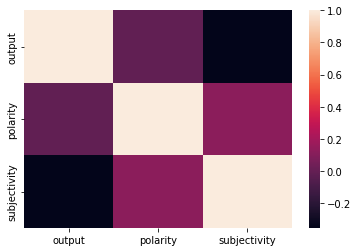

In [19]:
sns.heatmap(news_dataset.corr())

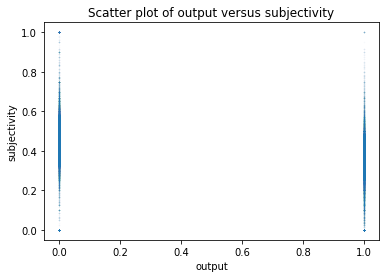

In [20]:
plt.plot(news_dataset['output'], news_dataset['subjectivity'], 'o', alpha=0.02, markersize=1)

plt.xlabel('output')
plt.ylabel('subjectivity')
plt.title('Scatter plot of output versus subjectivity');

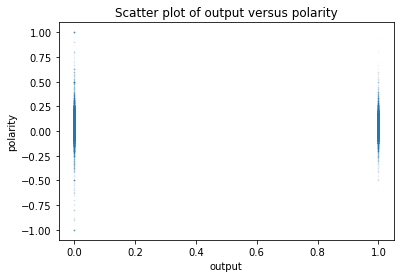

In [21]:
plt.plot(news_dataset['output'], news_dataset['polarity'], 'o', alpha=0.02, markersize=1)

plt.xlabel('output')
plt.ylabel('polarity')
plt.title('Scatter plot of output versus polarity');

c:\users\10\appdata\local\programs\python\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


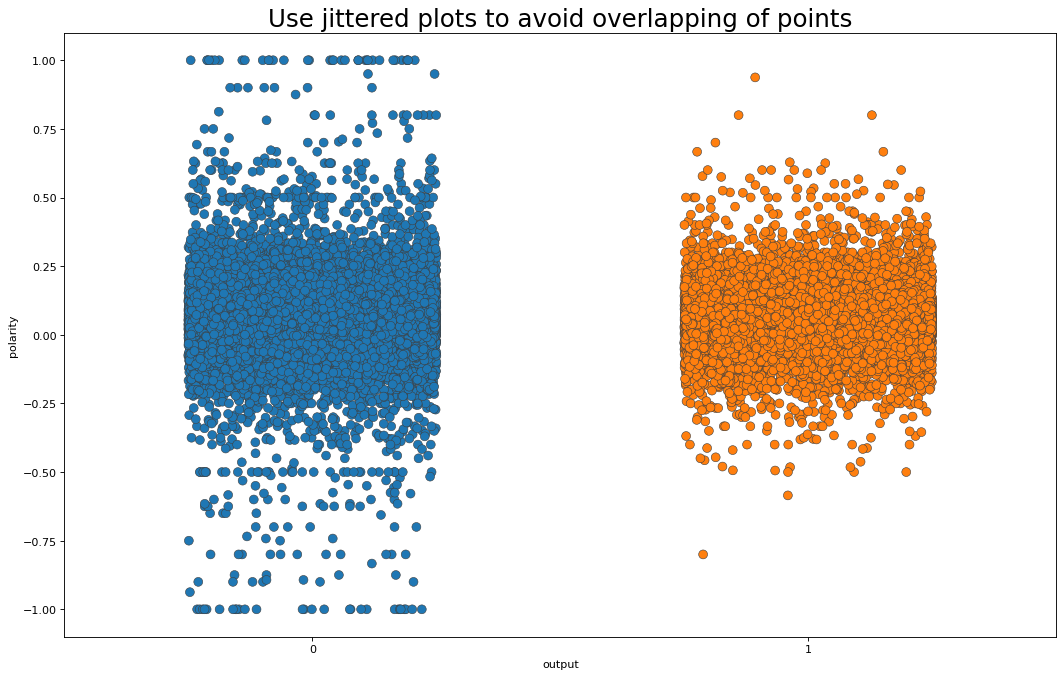

In [22]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(news_dataset['output'], news_dataset['polarity'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

c:\users\10\appdata\local\programs\python\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


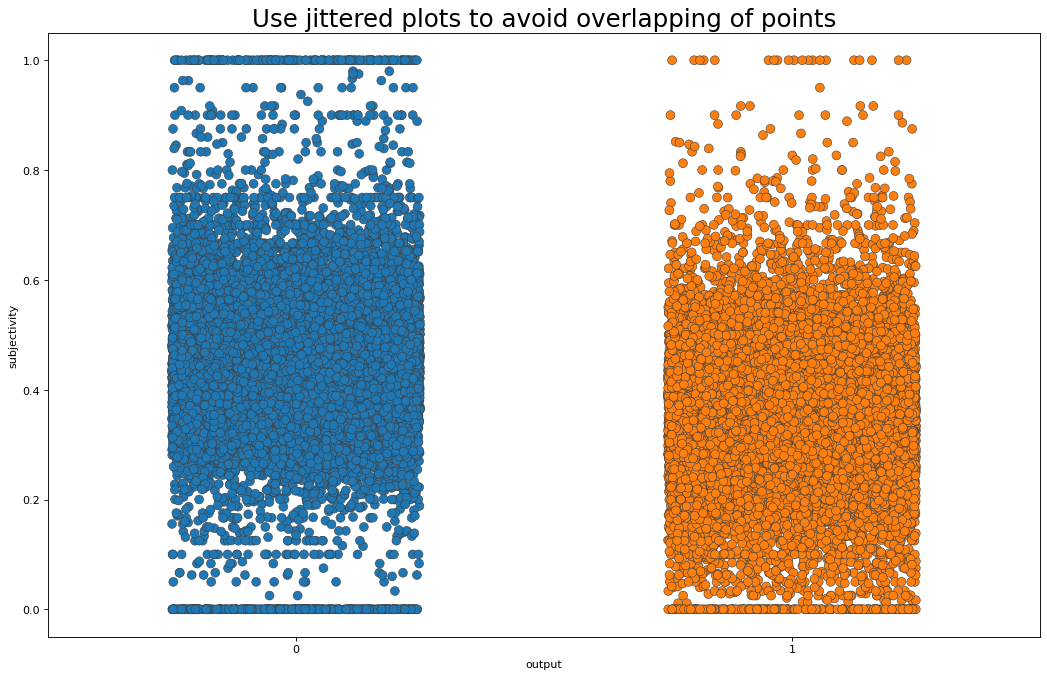

In [29]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(news_dataset['output'], news_dataset['subjectivity'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

In [28]:
# # Prepare Data
# x = news_dataset['output'].values.tolist()
# y1 = news_dataset['polarity'].values.tolist()
# y2 = news_dataset['subjectivity'].values.tolist()
# mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
# columns = ['polarity', 'subjectivity']

# # Draw Plot 
# fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
# ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
# ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# # Decorations
# ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
# ax.set(ylim=[0, 30])
# ax.legend(loc='best', fontsize=12)
# plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
# plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
# plt.xlim(-10, x[-1])

# # Draw Tick lines  
# for y in np.arange(2.5, 30.0, 2.5):    
#     plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# # Lighten borders
# plt.gca().spines["top"].set_alpha(0)
# plt.gca().spines["bottom"].set_alpha(.3)
# plt.gca().spines["right"].set_alpha(0)
# plt.gca().spines["left"].set_alpha(.3)
# plt.show()